In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# call custom script with functions to get meaningful statistics
%run formdata.py

In [2]:
import json
from pandas.io.json import json_normalize

# Retrieve dataset from source
apass = pd.read_json('https://www.quandl.com/api/v3/datasets/BTS_MM/AIRPASS.json')

-- In any given year, (between 1998 to 2012) people living in USA generally travel more within the country than internationally.


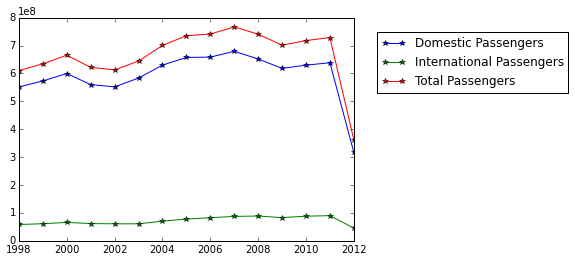

In [3]:
# Parse dataset into a dataframe with correct format for date column
data = pd.DataFrame(apass['dataset'][3], columns=(apass['dataset'][2]))
data['Date'] = data['Date'].astype('datetime64')

# call function from python script to calculate sum of values per year
dp = yearlysum(data, data.Date, 'Domestic Passengers')

ip = yearlysum(data, data.Date, 'International Passengers')

tp = yearlysum(data, data.Date, 'Total Passengers')

print "-- In any given year, (between 1998 to 2012) people living in USA generally travel more within the country than internationally."

# combine the yearly sums for various columns into single dataframe and plot on single graph
flt = pd.concat((dp, ip), axis=1)
full = pd.concat((flt, tp), axis=1)
full.plot(marker='*').legend(loc='center left', bbox_to_anchor=(1.05, 0.8));

-- The percentage of people travelling within USA is trending downwards over the years and people seem to have taken interest in travelling to other countries recently.

-- The percentage of people travelling to international destinations dipped in 2003 but has been rising every year from 9.46 in 2003 to 12.57 in 2012.



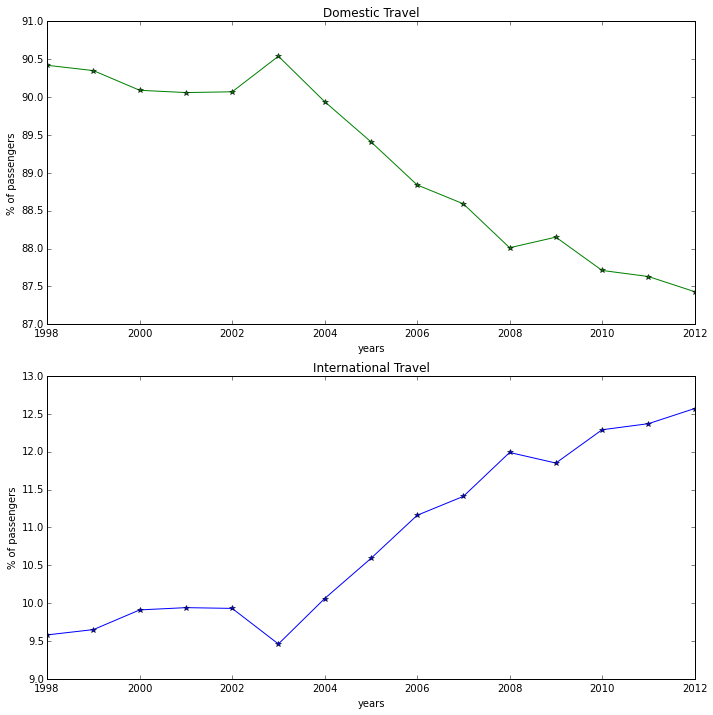

In [4]:
# call function from python script to calculate the percentage of value over total upto 2 decimal places
full['Perc Domestic'] = perc(full['Domestic Passengers'], full['Total Passengers'])
full['Perc International'] = perc(full['International Passengers'], full['Total Passengers'])

print "-- The percentage of people travelling within USA is trending downwards over the years and people seem to have taken interest in travelling to other countries recently.\n"
print "-- The percentage of people travelling to international destinations dipped in 2003 but has been rising every year from %s in 2003 to %s in 2012.\n" % (full.loc[2003]['Perc International'], full.loc[2012]['Perc International'])

# plot seperate graphs
fig, axes = plt.subplots(nrows=2, ncols = 1, figsize=(10,10))
full['Perc Domestic'].plot(ax=axes[0], title='Domestic Travel', color='g', marker='*')
full['Perc International'].plot(ax=axes[1], title='International Travel', color='b', marker='*')

# setting the axis labels
for a in range(len(axes)):
    axes[a].set_xlabel('years')
    axes[a].set_ylabel('% of passengers')
plt.tight_layout();

-- We clearly see a spike in travel (domestic and international) in the summer month of July consistently every year.

-- Even though the number of passengers varies each year, the trend of travel through the years remains about the same.

-- There is however, one noticeable drop in travel numbers (domestic and international) in September 2001 which can be correlated to the terrorist attack of 9/11.



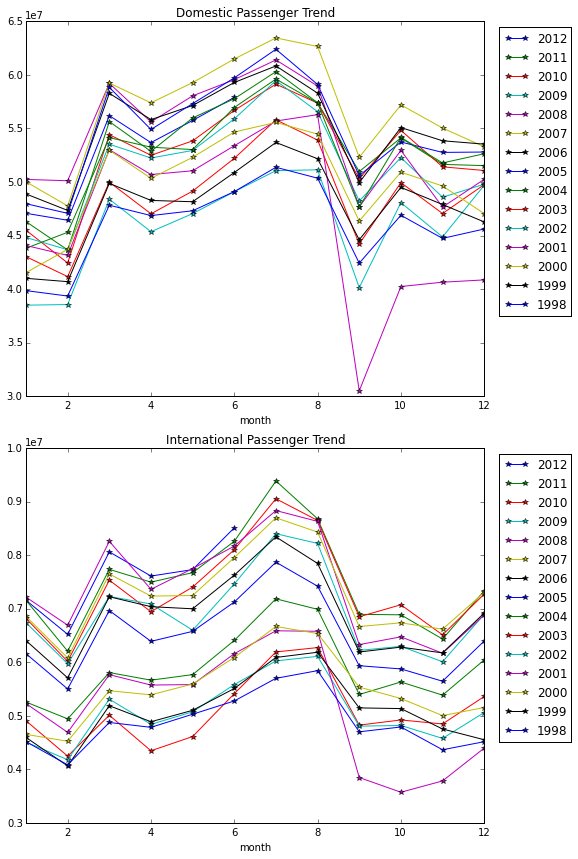

In [5]:
import dateutil.parser as dtu

# get unique values
uyear = data.Date.dt.year.unique()

data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month

print "-- We clearly see a spike in travel (domestic and international) in the summer month of July consistently every year.\n"
print "-- Even though the number of passengers varies each year, the trend of travel through the years remains about the same.\n"
print "-- There is however, one noticeable drop in travel numbers (domestic and international) in September 2001 which can be correlated to the terrorist attack of 9/11.\n"

# plot 2 seperate graphs for each value set for all the unique years
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,12))
for y in range(len(uyear)):
    data[data.year == uyear[y]][['month', 'Domestic Passengers']].set_index('month').sort_index().plot(ax=axes[0], marker="*", title='Domestic Passenger Trend', label=uyear[y]).legend(labels=uyear, loc='center left', bbox_to_anchor=(1.02, 0.6))
    data[data.year == uyear[y]][['month', 'International Passengers']].set_index('month').sort_index().plot(ax=axes[1], marker="*", title='International Passenger Trend', label=uyear[y]).legend(labels=uyear, loc='center left', bbox_to_anchor=(1.02, 0.6))
plt.tight_layout()

In [6]:
print "This dataset related to number of people travelling within USA and to other countries from USA, reveals that people are beating the heat and being more adventurous by trying to spend their summer outside USA.\n"
print "-- This does brings up curiosity regarding the actual nature of the travel though."
print "     a) Are people travelling for exploring new places?"
print "     b) or knowing that USA is the country of immigrants, are people actually travelling to their country of origin in the summer?"


print "\n\n\n\nReferences:"
print "  1) Data from https://www.quandl.com/api/v3/datasets/BTS_MM/AIRPASS.json"

This dataset related to number of people travelling within USA and to other countries from USA, reveals that people are beating the heat and being more adventurous by trying to spend their summer outside USA.

-- This does brings up curiosity regarding the actual nature of the travel though.
     a) Are people travelling for exploring new places?
     b) or knowing that USA is the country of immigrants, are people actually travelling to their country of origin in the summer?




References:
  1) Data from https://www.quandl.com/api/v3/datasets/BTS_MM/AIRPASS.json
